In [30]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("BitcoinSP500.csv",infer_datetime_format=True)
df = df.set_index(pd.DatetimeIndex(df["Date"].values))
df = df.drop("Date",axis=1)
df

Bitcoin Price  S&P500 Price
2011-11-28            2.5       1192.55
2011-11-29            2.8       1195.19
2011-11-30            3.0       1246.96
2011-12-01            3.1       1244.58
2011-12-02            3.1       1244.28
...                   ...           ...
2022-01-31        38498.6       4515.55
2022-02-01        38709.7       4546.54
2022-02-02        36890.2       4589.32
2022-02-03        37287.8       4477.44
2022-02-04        41567.6       4500.54

[2565 rows x 2 columns]

In [3]:
# Calculate the S&P500 daily return using the 'shift()' function
daily_returns = df.pct_change()
daily_returns

Bitcoin Price  S&P500 Price
2011-11-28            NaN           NaN
2011-11-29       0.120000      0.002214
2011-11-30       0.071429      0.043315
2011-12-01       0.033333     -0.001909
2011-12-02       0.000000     -0.000241
...                   ...           ...
2022-01-31       0.019963      0.018886
2022-02-01       0.005483      0.006863
2022-02-02      -0.047004      0.009409
2022-02-03       0.010778     -0.024378
2022-02-04       0.114777      0.005159

[2565 rows x 2 columns]

In [4]:
# Daily Standard Deviations
daily_std = daily_returns.std()
daily_std.head()

Bitcoin Price    0.087245
S&P500 Price     0.010362
dtype: float64

In [5]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

Bitcoin Price    1.384974
S&P500 Price     0.164490
dtype: float64

In [6]:
# Calculate Sharpe Ratio
# Sharpe ratios are commonly used to indicate whether or not an investment is a good decision. 
# While standard deviation illustrates how far an investment has deviated from its average, 
# Sharpe ratios use standard deviation to illustrate the relationship between standard deviation and risk-reward.
# The return-to-risk ratio can be used to determine which stocks and/or portfolios have outperformed the others. The higher the sharpe ratio, the better the investment.
# Sharpe ratios enable investors to judge whether or not an investment is a good decision. Sharpe ratios adjust for risk, making them a valuable indicator of asset performance.
sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios

Bitcoin Price    1.115766
S&P500 Price     0.876366
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

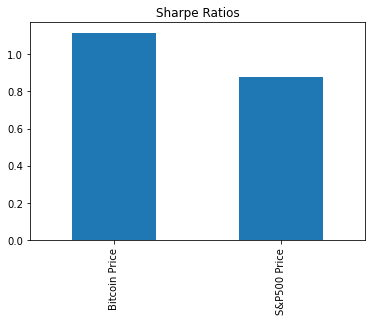

In [7]:
# Plot sharpe ratios 
# Bitcoin has higher Sharpe Ratio which means smarter investment
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [8]:
# daily returns during bitcoin halving Nov 28 2012
halving_1 = daily_returns.loc['2011-11-29':'2014-11-28']
halving_1

# daily returns during bitcoin halving July 9 2016
halving_2 = daily_returns.loc['2015-07-09':'2018-07-09']
halving_2

# daily returns during bitcoin halving May 11 2020
halving_3 = daily_returns.loc['2019-05-11':'2022-02-04']
halving_3

Bitcoin Price  S&P500 Price
2019-05-13       0.222361     -0.024131
2019-05-14       0.024161      0.008016
2019-05-15       0.021264      0.005839
2019-05-16      -0.035862      0.008895
2019-05-17      -0.065080     -0.005837
...                   ...           ...
2022-01-31       0.019963      0.018886
2022-02-01       0.005483      0.006863
2022-02-02      -0.047004      0.009409
2022-02-03       0.010778     -0.024378
2022-02-04       0.114777      0.005159

[691 rows x 2 columns]

In [12]:
halving_1_std = halving_1.std()
halving_1_std

Bitcoin Price    0.143734
S&P500 Price     0.007622
dtype: float64

In [15]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_1 = halving_1_std * np.sqrt(252)
annualized_std_1.head()

Bitcoin Price    2.281713
S&P500 Price     0.121001
dtype: float64

In [14]:
halving_2_std = halving_2.std()
halving_2_std

Bitcoin Price    0.046535
S&P500 Price     0.008246
dtype: float64

In [16]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_2 = halving_2_std * np.sqrt(252)
annualized_std_2.head()

Bitcoin Price    0.738712
S&P500 Price     0.130908
dtype: float64

In [13]:
halving_3_std = halving_3.std()
halving_3_std

Bitcoin Price    0.048463
S&P500 Price     0.014717
dtype: float64

In [17]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_3 = halving_3_std * np.sqrt(252)
annualized_std_3.head()

Bitcoin Price    0.769321
S&P500 Price     0.233629
dtype: float64

In [22]:
sharpe_ratio_1 = (halving_1.mean() * 252) / (halving_1.std() * np.sqrt(252))
sharpe_ratio_1

Bitcoin Price    1.323894
S&P500 Price     1.578829
dtype: float64

In [25]:
sharpe_ratio_2 = (halving_2.mean() * 252) / (halving_2.std() * np.sqrt(252))
sharpe_ratio_2

Bitcoin Price    1.818505
S&P500 Price     0.849309
dtype: float64

In [23]:
sharpe_ratio_3 = (halving_3.mean() * 252) / (halving_3.std() * np.sqrt(252))
sharpe_ratio_3

Bitcoin Price    1.283123
S&P500 Price     0.813885
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

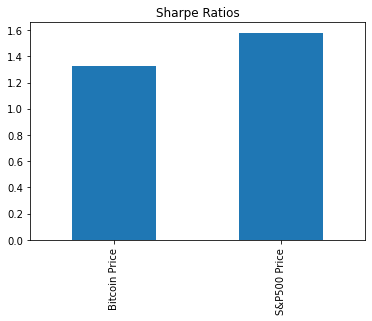

In [26]:
# Bitcoin has higher Sharpe Ratio which means smarter investment
sharpe_ratio_1.plot(kind="bar", title="Sharpe Ratios")

<AxesSubplot:title={'center':'Sharpe Ratios'}>

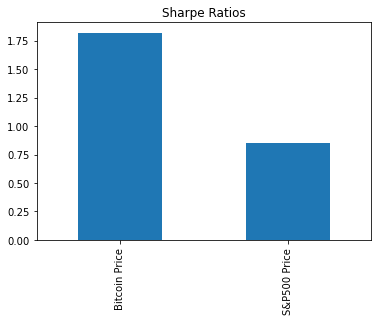

In [27]:
# Bitcoin has higher Sharpe Ratio which means smarter investment
sharpe_ratio_2.plot(kind="bar", title="Sharpe Ratios")

<AxesSubplot:title={'center':'Sharpe Ratios'}>

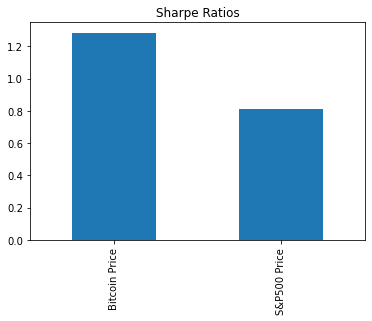

In [28]:
# Bitcoin has higher Sharpe Ratio which means smarter investment
sharpe_ratio_3.plot(kind="bar", title="Sharpe Ratios")

<AxesSubplot:>

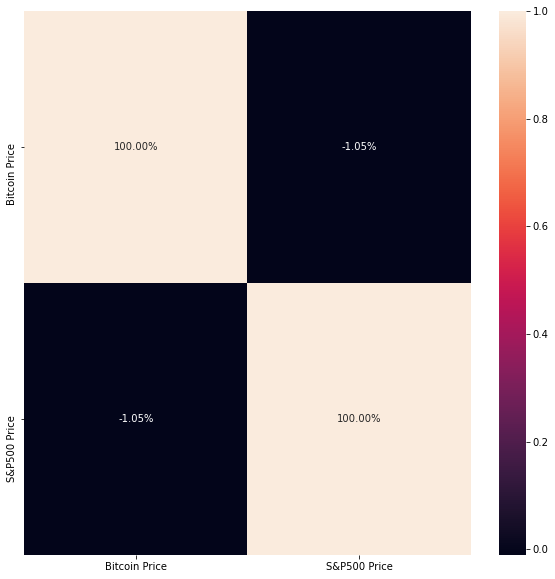

In [31]:
# Showing the correlation between both ETfs. Shows relationship between both etfs
plt.subplots(figsize=(10,10))
sns.heatmap(halving_1.corr(), annot=True, fmt=".2%")

<AxesSubplot:>

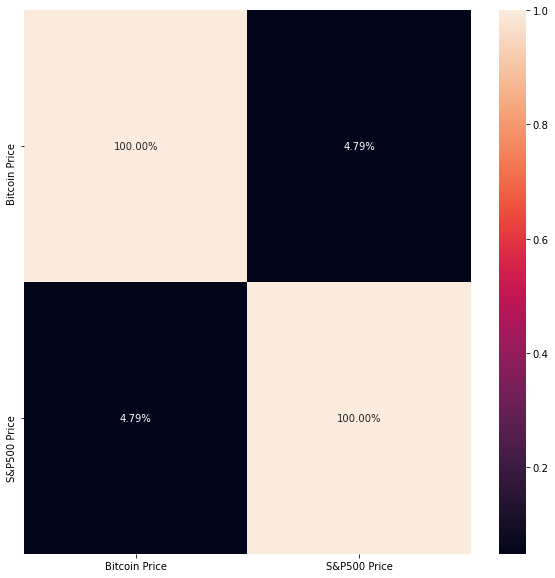

In [32]:
# Showing the correlation between both ETfs. Shows relationship between both etfs
plt.subplots(figsize=(10,10))
sns.heatmap(halving_2.corr(), annot=True, fmt=".2%")

<AxesSubplot:>

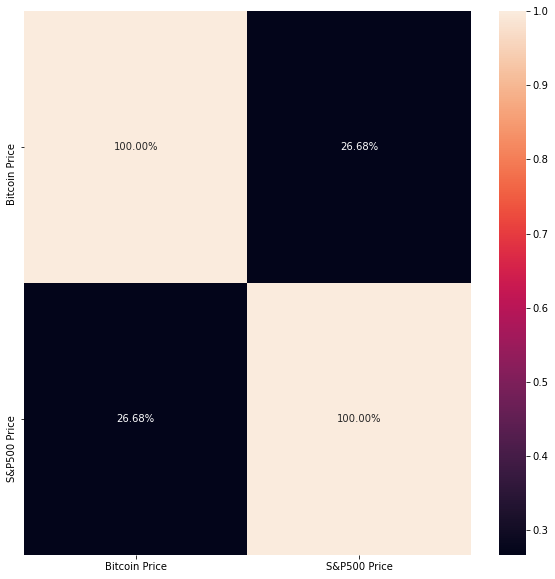

In [33]:
# Showing the correlation between both ETfs. Shows relationship between both etfs
plt.subplots(figsize=(10,10))
sns.heatmap(halving_3.corr(), annot=True, fmt=".2%")